In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import statistics
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
from __future__ import print_function
from scipy.integrate import simps
from numpy import trapz

In [5]:
p_dashboard = pd.read_excel('..\\volatility_metricPL\\excel_tables\\p_dashboard.xlsx')

### Testing out graphs with different pitchers

Gerrit Cole
1.40877818904674
0.2564593778552573
Lucas Giolito
1.40877818904674
0.2564593778552573
Chris Sale
1.40877818904674
0.2564593778552573
Justin Verlander
1.3476442558755521
0.15958434791713874
Chris Sale
1.3476442558755521
0.15958434791713874


C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


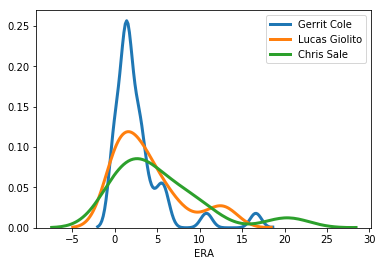

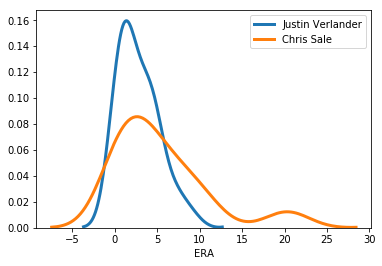

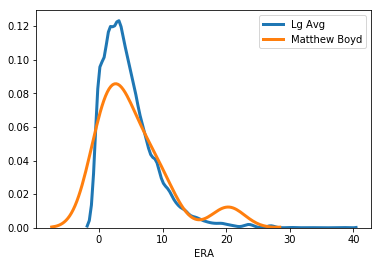

In [6]:
pitchers = ['Gerrit Cole', 'Lucas Giolito', 'Chris Sale']
pitchers_2 = ['Justin Verlander','Chris Sale']

plt.figure(0)
for pitcher in pitchers:
    subset = p_dashboard[p_dashboard['Name'] == pitcher]
#X = p_dashboard.loc[p_dashboard['Name']=='Mike Clevinger']
    p1 = sns.distplot(subset['ERA'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},label=pitcher)
    y = p1.get_lines()[0].get_data()[1]
    x = p1.get_lines()[0].get_data()[0]
    y_max = max(y)
    z = np.where(y == y_max)
    print(pitcher)
    print(x[z][0])
    print(y_max)
    

plt.figure(1)
for pitcher2 in pitchers_2: 
    subset_2 =p_dashboard[p_dashboard['Name'] == pitcher2]
    p2 = sns.distplot(subset_2['ERA'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},label=pitcher2) 
    y = p2.get_lines()[0].get_data()[1]
    x = p2.get_lines()[0].get_data()[0]
    y_max = max(y)
    z = np.where(y == y_max)
    print(pitcher2)
    print(x[z][0])
    print(y_max)

lg_avg = p_dashboard[p_dashboard['IP']>2]
plt.figure(2)
sns.distplot(lg_avg['ERA'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},label='Lg Avg')
sns.distplot(subset['ERA'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},label='Matthew Boyd')

### Getting all pitchers with over 120 innings pitched (idea is to exclude relievers from this sample). Produces ugly graph, but more used to get data associated with each player's graph

C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


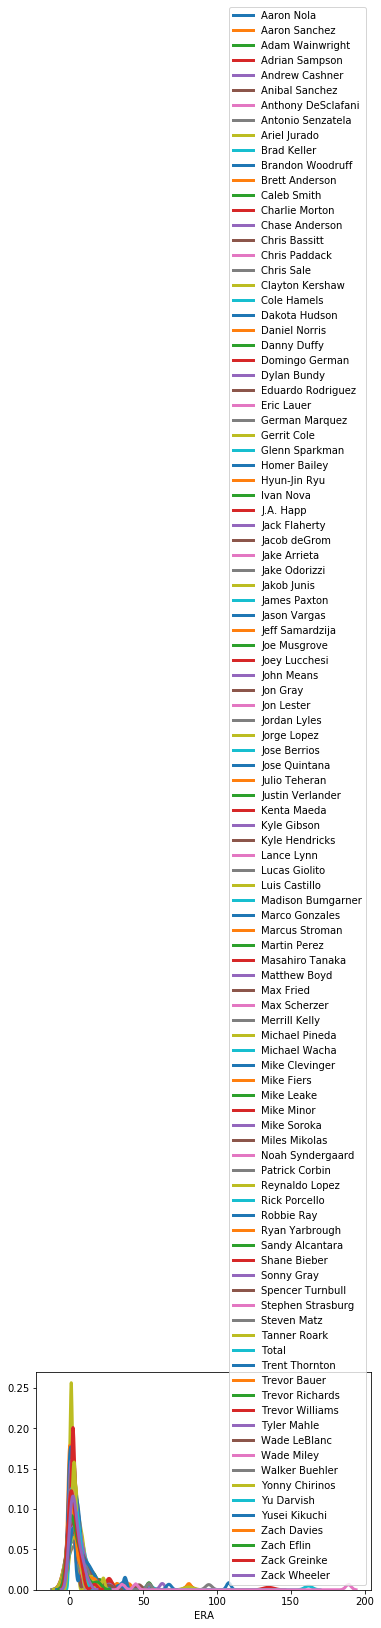

In [7]:
innings_pitched = p_dashboard.groupby('Name').sum()
#only including pitchers over 120 innings
ip_100 = innings_pitched.loc[innings_pitched['IP']>=120]
ip_100 = ip_100.reset_index()
#creating empty lists for metrics
pitchers_over100 = []
max_y = []
x_loc = []
metric = []
under3 = []
btwn3and45 = []
over45 = []
counter = 0
quartile_25 = []
quartile_50 = []
quartile_75 = []
#looping through list of pitchers over 120 innings to get each metric
for i in ip_100['Name']:
    pitchers_over100.append(i)
#test = ['Chris Sale','Gerrit Cole','Jacob deGrom']
for pitcher in pitchers_over100:
    subset = p_dashboard[p_dashboard['Name'] == pitcher]

    #plt.figure()
    p1 = sns.distplot(subset['ERA'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},label=pitcher)
    #y and x data of PDF plot
    y = p1.get_lines()[counter].get_data()[1]
    x = p1.get_lines()[counter].get_data()[0]
    counter = counter+1
    #maximum y value of PDF plot
    y_max = max(y)
    max_y.append(y_max)
    #x value at max y
    z = np.where(y == y_max)
    x_era = x[z][0]
    x_loc.append(x_era)
    #was trying to test a new metric, but didn't prove significant, dont need this 
    metric.append(x_era/y_max)
    #getting area under PDF - probability of each event - chance of <3 era, 3 to 4.5 era, and over 4.5 era
    y_int = integrate.cumtrapz(y, x, initial=0)
    z_u3 = np.where(x<3)
    z_3to45 = np.where(x<=4.5)
    less_3 = y_int[len(z_u3[0])-1]
    t3to45 = y_int[len(z_3to45[0])-1] - less_3
    great_45 = y_int[len(x)-1] - (t3to45+less_3) 
    under3.append(less_3)
    btwn3and45.append(t3to45)
    over45.append(great_45)
    #getting era values of first, second and third quartiles
    z_25 = np.where(y_int<=.25)
    z_50 = np.where(y_int<=.5)
    z_75 = np.where(y_int<=.75)
    x_25 = x[len(z_25[0])-1]
    x_50 = x[len(z_50[0])-1]
    x_75 = x[len(z_75[0])-1]
    quartile_25.append(x_25)
    quartile_50.append(x_50)
    quartile_75.append(x_75)

In [8]:
df = pd.DataFrame()

In [9]:
#creating dataframe with metrics 
df['Name'] = pitchers_over100
df['Most Likely ERA'] = x_loc
df['max Y value'] = max_y
df['% Chance < 3.00'] = under3
df['% 3<x<4.5'] = btwn3and45
df['% > 4.50'] = over45
df['boom_bust'] = df['% Chance < 3.00'] + df['% > 4.50']
df['25% Quartile'] = quartile_25
df['50% Quartile'] = quartile_50
df['75% Quartile'] = quartile_75 
df['75-25'] = abs(df['75% Quartile']-df['25% Quartile'])

In [10]:
#sorting on the 75% quartile minus 25% quartile to get range of values (volatility)
df.sort_values(by='75-25', ascending=False)

Name  Most Likely ERA  max Y value  % Chance < 3.00  \
7    Antonio Senzatela         3.640654     0.054275         0.280154   
3       Adrian Sampson         1.309046     0.061376         0.378206   
78      Reynaldo Lopez         2.649747     0.064706         0.322060   
4       Andrew Cashner         1.628292     0.069390         0.420542   
95        Wade LeBlanc         3.005186     0.072485         0.297727   
100      Yusei Kikuchi         3.230920     0.076680         0.322912   
48         Jorge Lopez         3.196744     0.066150         0.337101   
8         Ariel Jurado         2.062551     0.065569         0.412494   
90      Trent Thornton         2.109397     0.082120         0.372201   
29      Glenn Sparkman         6.712356     0.067869         0.280921   
46          Jon Lester         1.942357     0.081185         0.414608   
42        Joe Musgrove         2.293635     0.082172         0.439017   
69       Michael Wacha         1.682555     0.095311         0.418546   
50       Jose Quintana         3.165876     0.078675         0.364617   
81      Ryan Yarbrough         1.496679     0.090523         0.466495   
67       Merrill Kelly         2.585397     0.085741         0.388479   
32           Ivan Nova         1.957825     0.090119         0.411389   
1        Aaron Sanchez         3.835491     0.078378         0.298353   
17          Chris Sale         2.738152     0.085610         0.373512   
91        Trevor Bauer         1.991806     0.092494         0.389285   
79       Rick Porcello         3.406941     0.080758         0.226509   
65           Max Fried         1.889212     0.084331         0.424407   
30        Homer Bailey         2.516049     0.098200         0.410587   
2      Adam Wainwright         2.496045     0.086242         0.374025   
39        James Paxton         1.885324     0.102117         0.464469   
102         Zach Eflin         1.584418     0.091935         0.445485   
47        Jordan Lyles         1.976815     0.109759         0.450689   
63     Masahiro Tanaka         2.102537     0.092590         0.387487   
94         Tyler Mahle         4.760400     0.079968         0.318724   
62        Martin Perez         3.910073     0.088656         0.299471   
..                 ...              ...          ...              ...   
96          Wade Miley         2.686244     0.124194         0.399562   
49        Jose Berrios         2.719528     0.124056         0.432091   
86   Stephen Strasburg         1.624974     0.119889         0.492689   
60      Marco Gonzales         2.718012     0.138001         0.414649   
40        Jason Vargas         3.735051     0.127696         0.319345   
20       Dakota Hudson         3.626223     0.116838         0.447211   
64        Matthew Boyd         4.248846     0.122073         0.298882   
61      Marcus Stroman         1.881785     0.128643         0.485682   
37       Jake Odorizzi         1.329429     0.119826         0.478839   
89               Total         2.982685     0.132280         0.368022   
84          Sonny Gray         1.390775     0.124624         0.492933   
44          John Means         1.985163     0.148279         0.510429   
59   Madison Bumgarner         3.198232     0.128687         0.383106   
77      Patrick Corbin         1.489921     0.144040         0.508934   
13      Charlie Morton         1.901552     0.140374         0.512832   
56          Lance Lynn         2.002230     0.145143         0.479651   
68      Michael Pineda         3.476545     0.132528         0.386126   
14      Chase Anderson         3.333899     0.151818         0.420709   
98      Yonny Chirinos         3.360442     0.158205         0.418831   
66        Max Scherzer         1.816376     0.150839         0.531733   
31        Hyun-Jin Ryu         0.600762     0.178943         0.679048   
18     Clayton Kershaw         3.258061     0.142058         0.499099   
11      Brett Anderson         3.097598     0.153674         0.391862   
58 

In [11]:
#comparison of 2 pitchers in the same tier - Musgrove more volatile than Miley
df.loc[(df['Name'] == 'Joe Musgrove')|(df['Name']=='Wade Miley')]

Name  Most Likely ERA  max Y value  % Chance < 3.00  % 3<x<4.5  \
42  Joe Musgrove         2.293635     0.082172         0.439017   0.101987   
96    Wade Miley         2.686244     0.124194         0.399562   0.180782   

    % > 4.50  boom_bust  25% Quartile  50% Quartile  75% Quartile     75-25  
42  0.458845   0.897862      0.319459      3.609752      7.887133  7.567675  
96  0.419315   0.818877      1.116778      2.686244      5.825176  4.708398